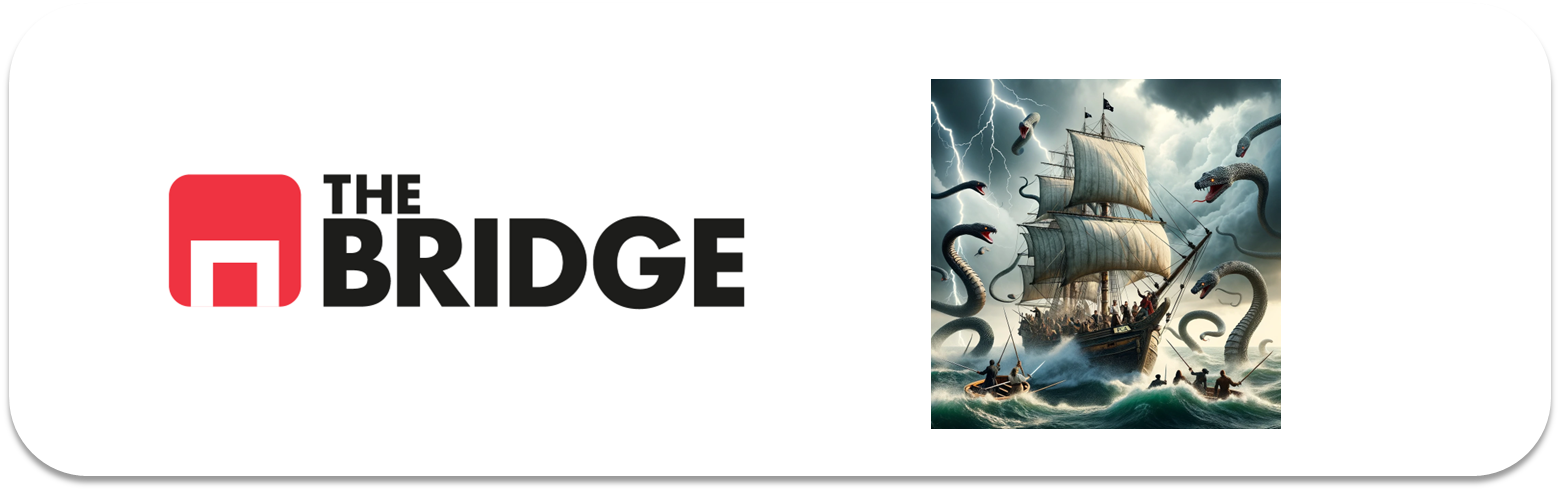

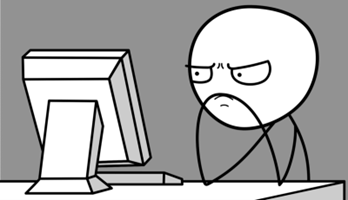

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import bootcampviztools as bt

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv("data/nutrition.csv")
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
bt.tipifica_variable_plus(df)

Umbral de 'CARD_valores_unicos' para considerarla 'Categórica':  10
Umbral de 'CARD_%' para considerarla 'Numérica Continua':  30.0


,Variable,Missings_%,Dtype_real,CARD_valores_unicos,CARD_%,Dtype_sugerido
0,ID,0.00,int64,8618,100.00,Numérica Continua
1,FoodGroup,0.00,object,25,0.29,Numérica Discreta
2,ShortDescrip,0.00,object,8614,99.95,Numérica Continua
3,Descrip,0.00,object,8618,100.00,Numérica Continua
4,CommonName,87.67,object,443,5.14,Numérica Discreta
5,MfgName,81.90,object,92,1.07,Numérica Discreta
6,ScientificName,91.51,object,469,5.44,Numérica Discreta
7,Energy_kcal,0.00,float64,666,7.73,Numérica Discreta
8,Protein_g,0.00,float64,2642,30.66,Numérica Continua
9,Fat_g,0.00,float64,2405,27.91,Numérica Discreta


### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

In [4]:
np.abs(df.corr(numeric_only = True))

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ID,1.000000,0.126126,0.075538,0.011996,0.177297,0.082710,0.008252,0.031211,0.060463,0.016512,...,0.051166,0.010387,0.024343,0.011311,0.050720,0.003765,0.001867,0.045925,0.011775,0.009195
Energy_kcal,0.126126,1.000000,0.110302,0.806795,0.487096,0.313151,0.197338,0.026329,0.121872,0.012292,...,0.145936,0.174991,0.155830,0.187439,0.123571,0.099513,0.255880,0.195181,0.056673,0.112766
Protein_g,0.075538,0.110302,1.000000,0.054715,0.301974,0.266170,0.072777,0.026483,0.228485,0.245423,...,0.008939,0.376939,0.202480,0.098360,0.046888,0.158900,0.218611,0.444608,0.378369,0.416315
Fat_g,0.011996,0.806795,0.054715,1.000000,0.054116,0.001962,0.028842,0.024379,0.046950,0.020786,...,0.058049,0.022671,0.036286,0.005785,0.015039,0.042765,0.070781,0.066086,0.037559,0.028264
Carb_g,0.177297,0.487096,0.301974,0.054116,1.000000,0.615344,0.458192,0.001871,0.195571,0.094636,...,0.325170,0.173285,0.232408,0.281809,0.189106,0.062106,0.287207,0.073180,0.114600,0.012187
Sugar_g,0.082710,0.313151,0.266170,0.001962,0.615344,1.000000,0.115916,0.010143,0.088767,0.050450,...,0.161257,0.034378,0.125225,0.097751,0.129540,0.005837,0.041308,0.049784,0.123708,0.021991
Fiber_g,0.008252,0.197338,0.072777,0.028842,0.458192,0.115916,1.000000,0.005910,0.242804,0.052045,...,0.249075,0.135257,0.157703,0.205211,0.232286,0.185044,0.542038,0.158422,0.035897,0.085154
VitA_mcg,0.031211,0.026329,0.026483,0.024379,0.001871,0.010143,0.005910,1.000000,0.136605,0.581004,...,0.108517,0.151679,0.325709,0.052921,0.034822,0.569945,0.024572,0.055814,0.048043,0.070541
VitB6_mg,0.060463,0.121872,0.228485,0.046950,0.195571,0.088767,0.242804,0.136605,1.000000,0.264325,...,0.550087,0.714143,0.581678,0.417011,0.177268,0.116326,0.293169,0.213395,0.109004,0.447143
VitB12_mcg,0.016512,0.012292,0.245423,0.020786,0.094636,0.050450,0.052045,0.581004,0.264325,1.000000,...,0.158483,0.279033,0.436182,0.099601,0.011715,0.570642,0.004124,0.148774,0.215308,0.298136


<Axes: >

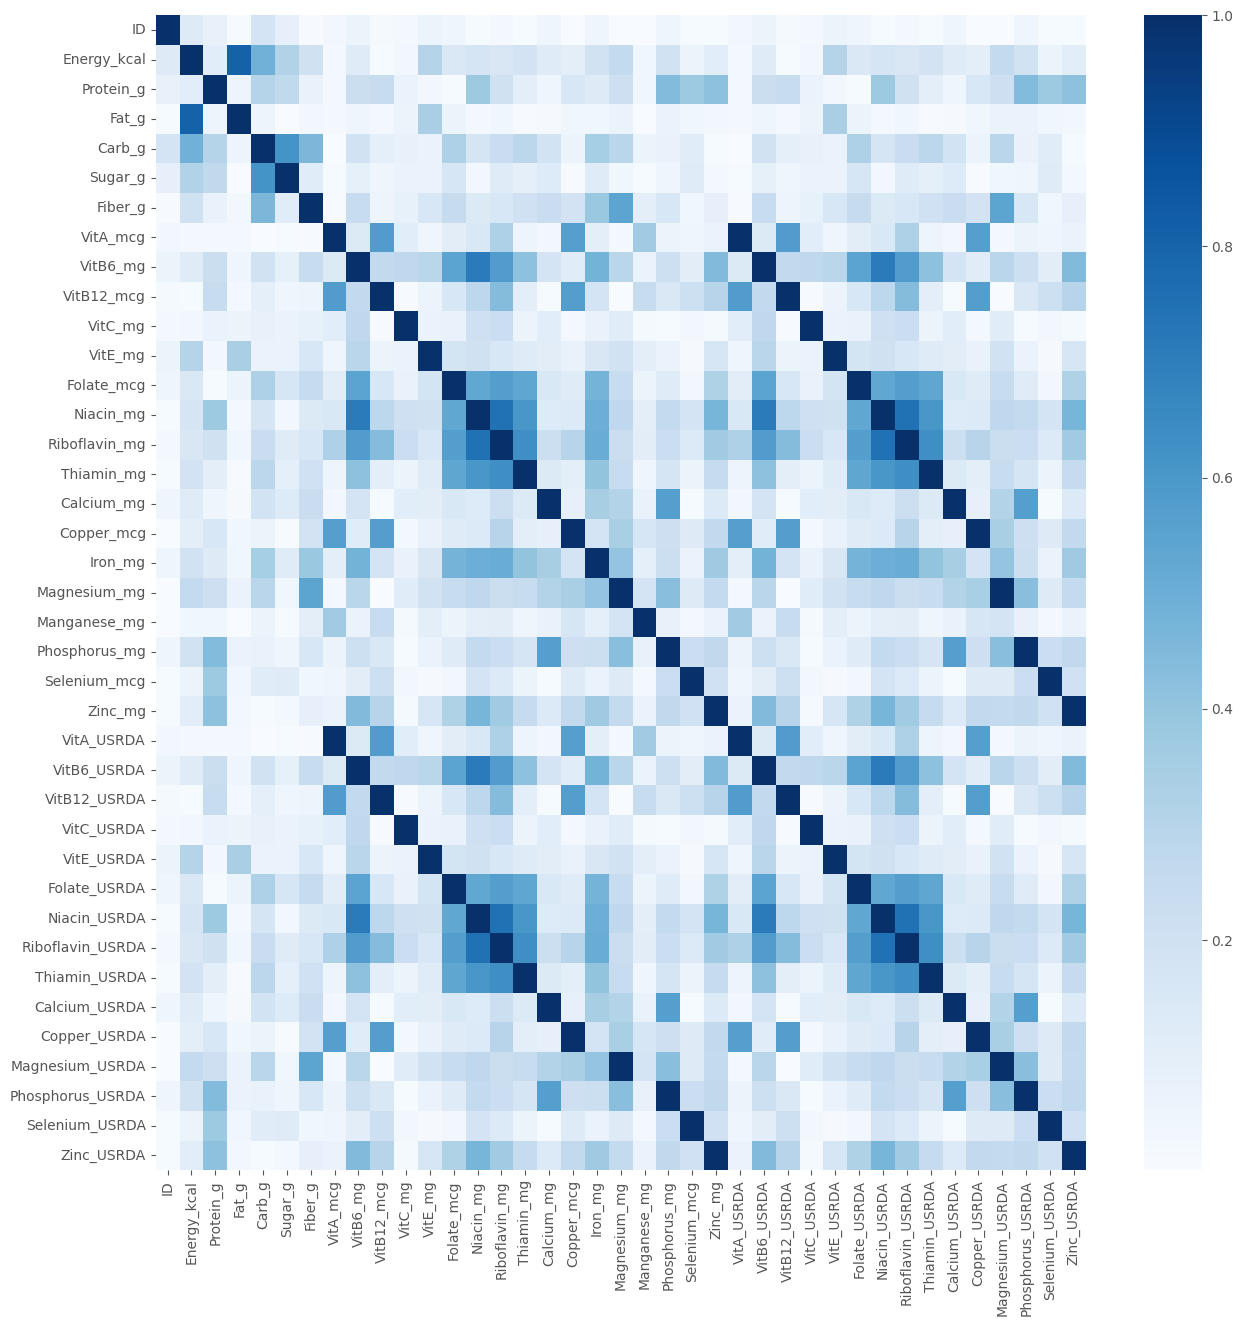

In [5]:
plt.figure(figsize = (15,15))
sns.heatmap(np.abs(df.corr(numeric_only = True)), annot= False, cmap = "Blues")

In [6]:
# alguna columna que sobra (como ID o manganese_mg)

# Viendo el HEATMAP es como si hubiese 1 df (mg) dentro de otro
# Las primeras columnas parecen características generales (y la mayoría están en uds de gramos)
# luego están los compuestos vitamínicos en miligramos (se podría relacionar)
# luego los mismos compuestos pero en USRDA, que no se lo que es

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [7]:
#se repiten respecto a mg, así que podría cargármelas

In [8]:
df_backup1 = df.copy()

In [9]:
df = df.drop(columns=df.filter(regex='_USRDA$').columns)
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [10]:
df_backup2 = df.copy()

In [11]:
df = df.drop(columns=df.select_dtypes(include=['object']).columns)
df.head()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


<Axes: >

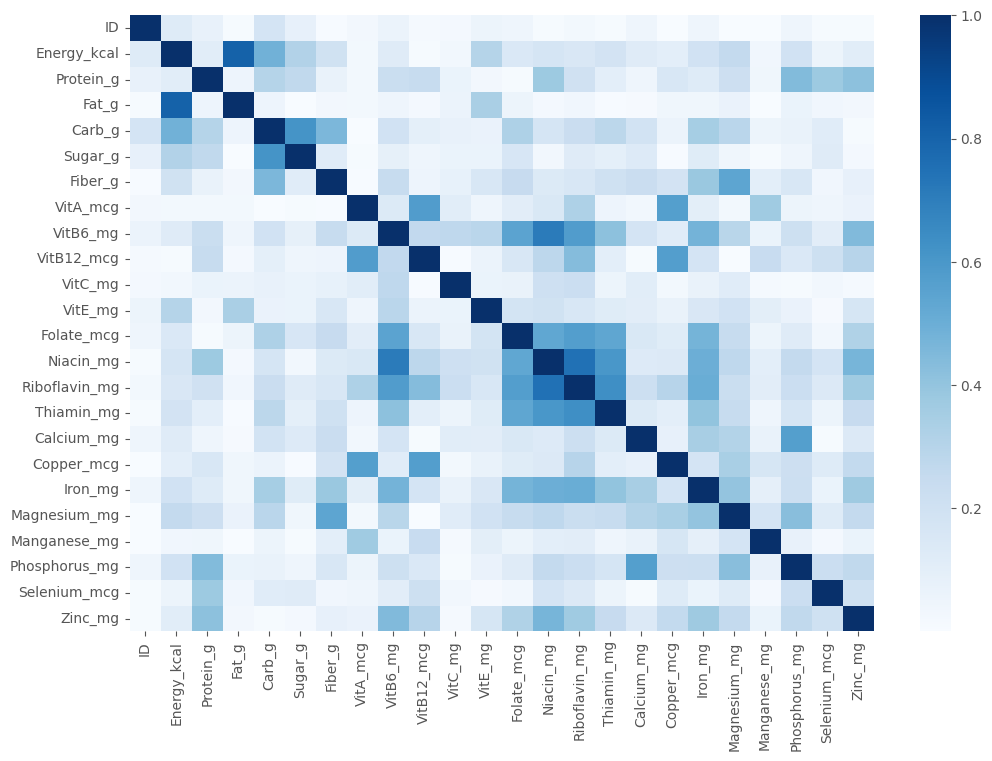

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(np.abs(df.corr(numeric_only = True)), annot= False, cmap = "Blues")

In [13]:
df_backup3 = df.copy()

df = df.drop(columns=["ID"])
df.head(3)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01


### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


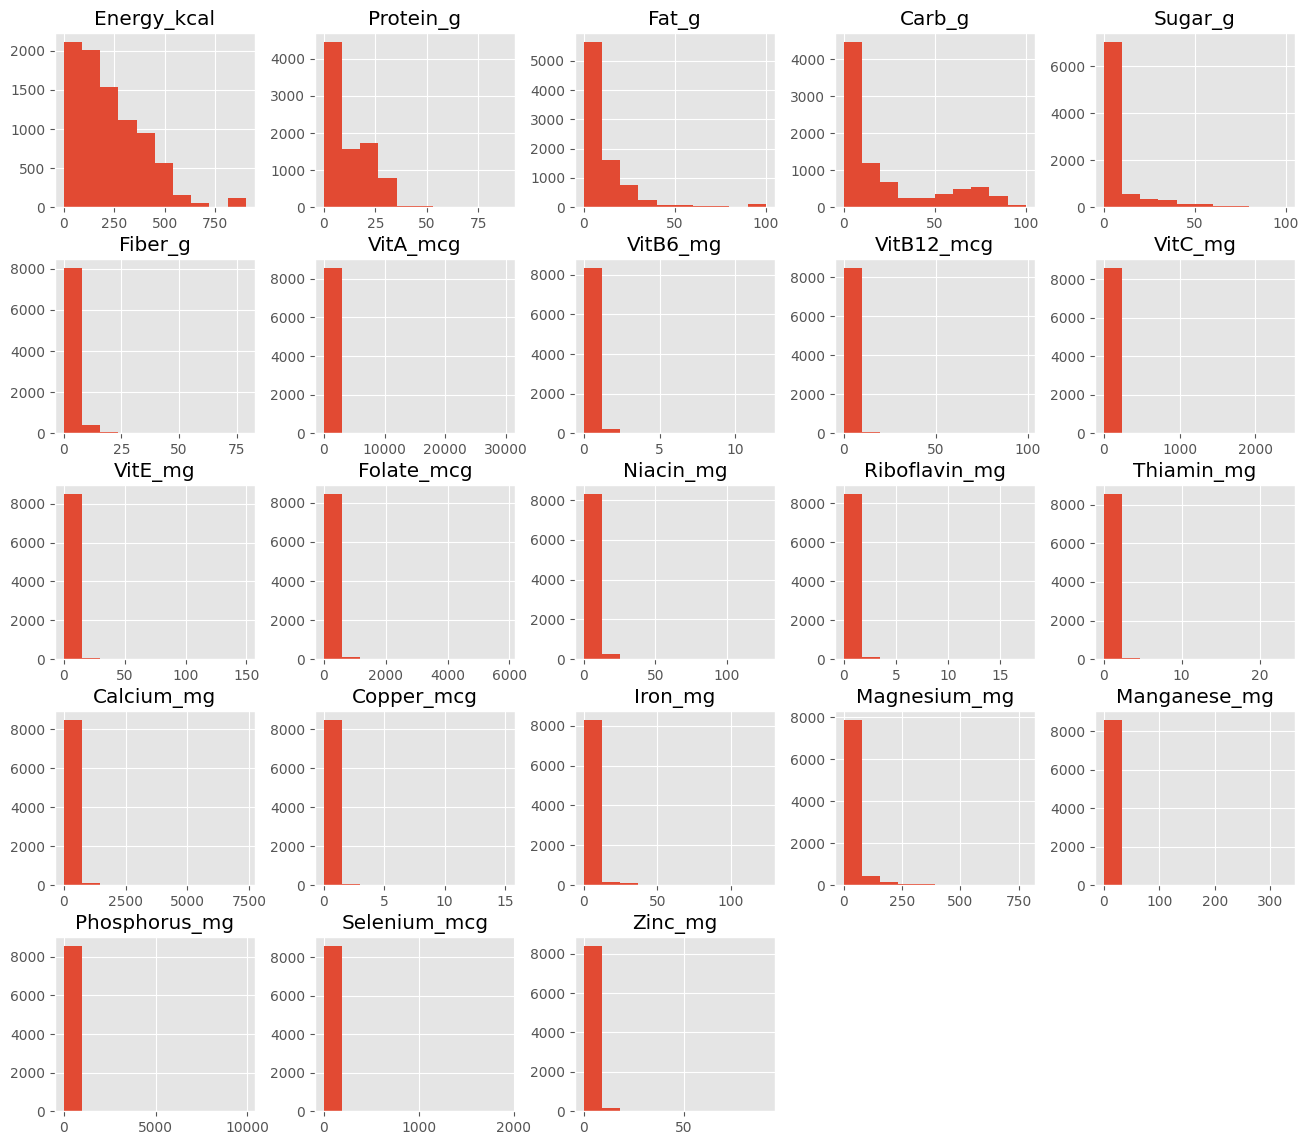

In [14]:
plt.figure(figsize=(16, 14))
df.hist(ax=plt.gca())
plt.show()

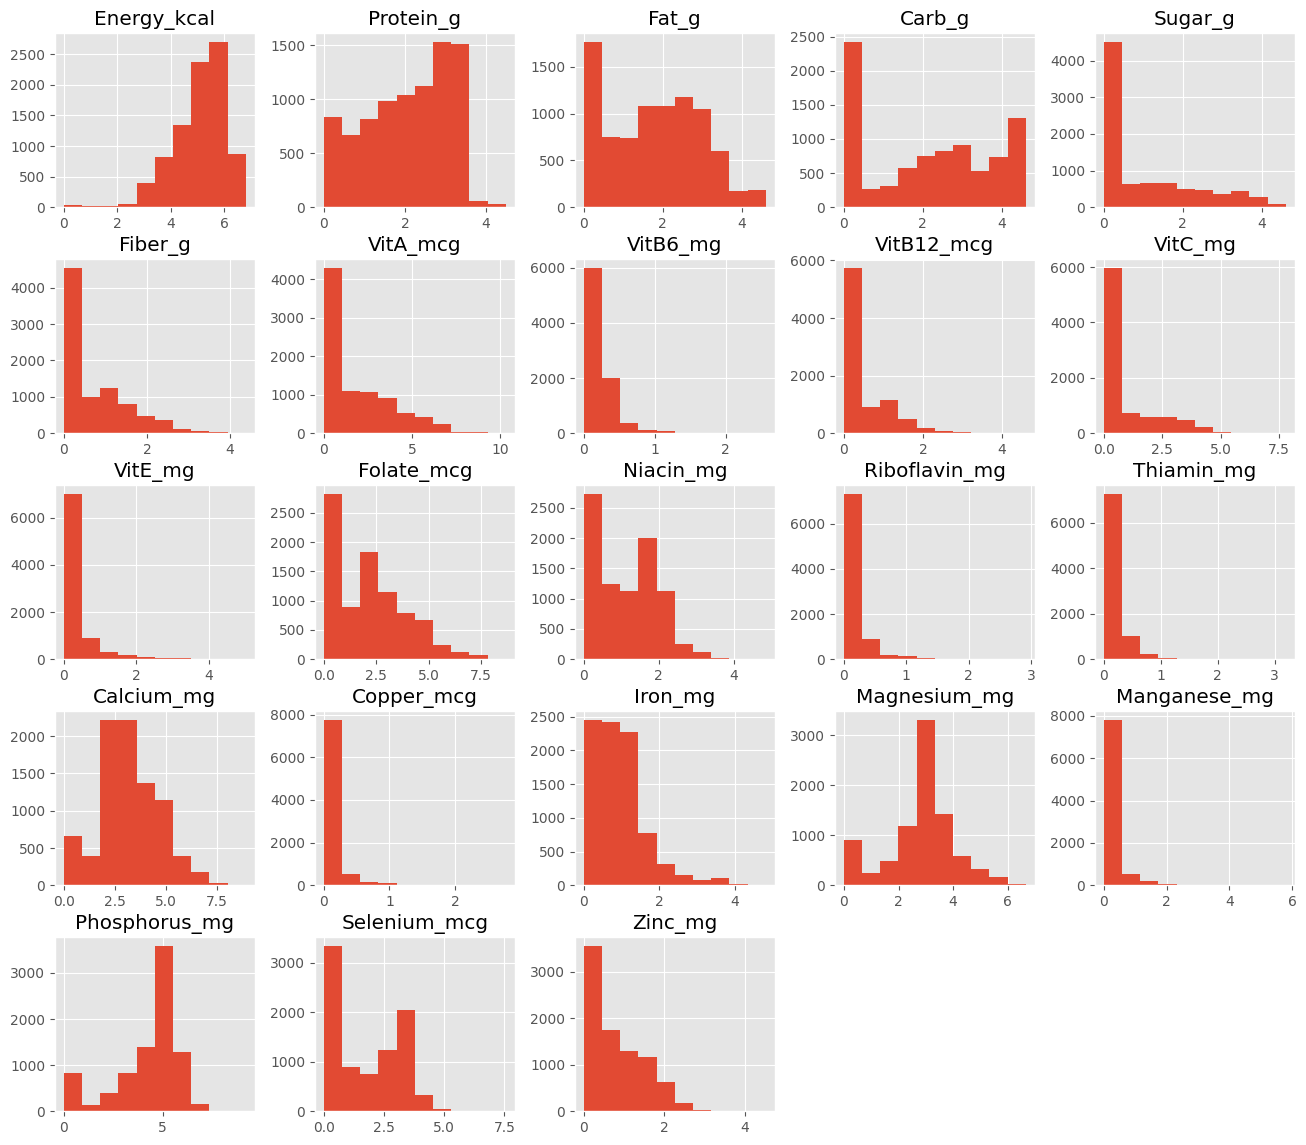

In [15]:
df_log = np.log1p(df) 
plt.figure(figsize=(16,14))
df_log.hist(ax=plt.gca())
plt.show()

In [16]:
df.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.237248,0.209857,73.411348,0.172181,2.696771,32.745301,0.504439,155.986308,12.614945,1.970216
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.449880,0.518369,201.363662,0.553052,5.726967,56.068454,6.383438,203.093234,28.292347,3.358213
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.046000,0.030000,9.000000,0.030000,0.530000,10.000000,0.000000,37.000000,0.100000,0.230000
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.150000,0.077500,19.000000,0.079000,1.330000,20.000000,0.022000,133.000000,3.900000,0.845000
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.260000,0.223000,62.000000,0.144750,2.580000,29.000000,0.222000,216.000000,21.300000,2.700000
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,17.500000,23.375000,7364.000000,15.050000,123.600000,781.000000,328.000000,9918.000000,1917.000000,90.950000


In [17]:
df_log.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,5.075155,2.073285,1.783379,2.118534,1.018775,0.670117,1.698699,0.197749,0.454007,0.804010,...,0.181921,0.156594,3.153335,0.126583,0.939353,2.809058,0.183168,4.262292,1.698225,0.800092
std,0.974674,1.056886,1.181014,1.610507,1.278396,0.819444,2.044344,0.240045,0.654592,1.266192,...,0.216586,0.222113,1.507092,0.202792,0.712336,1.292329,0.382983,1.718525,1.434322,0.695503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.543295,1.244155,0.689388,0.039221,0.000000,0.000000,0.000000,0.033676,0.000000,0.000000,...,0.044973,0.029559,2.302585,0.029559,0.425268,2.397895,0.000000,3.637586,0.095310,0.207014
50%,5.257495,2.228400,1.830178,2.297070,0.314811,0.262364,0.895880,0.113329,0.076961,0.000000,...,0.139762,0.074643,2.995732,0.076035,0.845868,3.044522,0.021761,4.897840,1.589235,0.612476
75%,5.820083,3.043450,2.701361,3.523415,1.840550,1.223775,3.091042,0.303801,0.831820,1.252763,...,0.231112,0.201307,4.143135,0.135186,1.275363,3.401197,0.200489,5.379897,3.104587,1.308333
max,6.805723,4.492225,4.615121,4.615121,4.613138,4.382027,10.308986,2.564949,4.604070,7.783641,...,2.917771,3.193558,8.904494,2.775709,4.825109,6.661855,5.796058,9.202207,7.559038,4.521245


(23, 2)


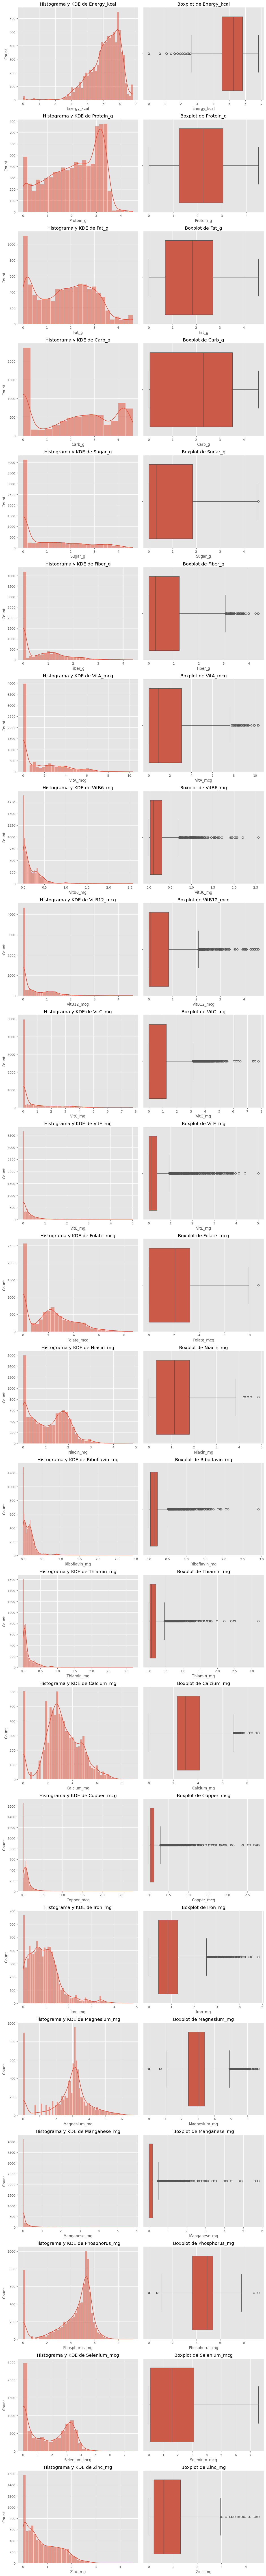

In [18]:
bt.plot_combined_graphs(df_log, columns= df_log.columns)

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [19]:
scaler = StandardScaler()

df_scaled = df_log.copy()

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
df_scaled.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398


In [20]:
df_scaled.describe().loc[['mean', 'std']]

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
mean,-2.160155e-16,1.945789e-16,9.069355e-17,2.473460e-16,-1.286199e-16,-1.813871e-17,1.022364e-16,6.430997e-17,-5.111818e-17,4.122434e-17,...,1.071833e-16,-7.255484e-17,5.936305e-17,-1.603627e-16,-6.595895e-17,5.194267e-17,8.244868e-18,-4.452229e-17,-1.401628e-16,5.441613e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00


### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [21]:
modelo_PCA = PCA()

modelo_PCA.fit(df_scaled)

PCA()

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [22]:
pd.DataFrame(
    data    = modelo_PCA.components_, # En components están los autovectores es decir los coeficientes de la PCA
    columns = df_scaled.columns,
    index= [f"PC{i}" for i in range(len(df_scaled.columns))]
)


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC0,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC1,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC2,0.522265,0.079023,0.473911,0.210881,0.184202,0.136179,-0.292311,-0.159116,-0.185990,-0.394600,...,-0.096958,0.057955,-0.093723,-0.040051,0.039002,-0.073287,0.029160,-0.016400,-0.062524,-0.039190
PC3,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC4,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC5,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC6,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC7,-0.006633,0.043613,-0.090748,-0.000223,0.484500,0.066867,-0.381964,0.084649,0.247129,0.302244,...,-0.196122,-0.395320,0.056744,0.055444,-0.003136,0.191494,-0.196760,0.103840,-0.009711,0.317642
PC8,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC9,0.295080,0.017928,0.318727,0.035122,-0.210174,-0.101103,-0.080107,-0.183531,-0.065568,0.639078,...,-0.088774,-0.001610,-0.233598,0.020123,0.103469,0.016090,-0.165279,0.021910,-0.085098,-0.002007


### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


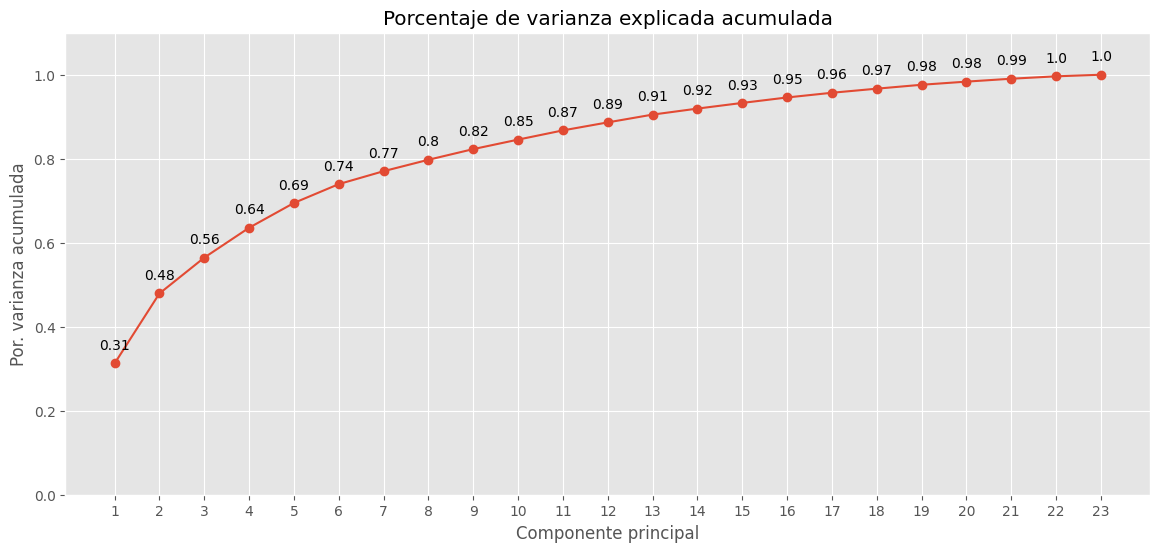

In [23]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_PCA.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
ax.plot(
    np.arange(len(df_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_PCA.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [24]:
prop_varianza_acum[5]

0.7395389215549493

- 70-75% significa quedarte con unas 5-6 Componentes principales

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [25]:
model_PCAdo = PCA(6)

model_PCAdo.fit(df_scaled)

PCA(n_components=6)

In [27]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = model_PCAdo.transform(X=df_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = df_scaled.columns[0 : model_PCAdo.n_components_],
    index   = df_scaled.index
)
proyecciones

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876
...,...,...,...,...,...,...
8613,2.553661,-2.548700,-0.472185,-0.109428,2.716513,0.018570
8614,0.075018,-1.840922,-0.935725,-1.348908,-0.392092,-0.759672
8615,-2.930529,1.664405,1.242070,1.172396,-0.915550,-0.885902
8616,1.118895,-0.780834,-0.805126,-1.581838,1.641702,1.090002
